In [1]:
import os
from pathlib import Path
os.chdir("/Users/mregan/Dev/litmus/")
print(Path.cwd())

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

/Users/mregan/Dev/litmus


In [2]:
import pandas as pd
import numpy as np

from user_data.litmus import get_labeled_data
from user_data.litmus import meta_model

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

In [3]:
ld = get_labeled_data.GetLabeledData(
    timeframe='5m',
    latest=False,
    bt_filename='backtest_kamaprimary-2022-05-31_16-22-16.json',
    bt_pkl_filename='backtest_kamaprimary-2022-05-31_16-22-17_signals.pkl')

In [4]:
df = ld.get_all_data()
df

open     high      low  \
strategy    pair       date                                                   
KamaPrimary 1INCH/USDT 2020-12-25 16:35:00+00:00  2.08350  2.19000  2.08180   
                       2020-12-25 18:25:00+00:00  1.98000  2.09070  1.98000   
                       2020-12-25 18:55:00+00:00  2.11630  2.22000  2.11400   
                       2020-12-26 00:00:00+00:00  2.29580  2.43310  2.26000   
                       2020-12-26 04:10:00+00:00  2.03070  2.10000  2.02610   
...                                                   ...      ...      ...   
            XRP/USDT   2020-02-19 05:45:00+00:00  0.29511  0.29662  0.29475   
                       2020-02-19 06:15:00+00:00  0.29640  0.29734  0.29609   
                       2020-02-19 08:30:00+00:00  0.29449  0.29528  0.29374   
                       2020-02-19 08:50:00+00:00  0.29565  0.29618  0.29551   
                       2020-02-19 11:15:00+00:00  0.29496  0.29541  0.29493   

                                                    close      volume  \
strategy    pair       date                                             
KamaPrimary 1INCH/USDT 2020-12-25 16:35:00+00:00  2.14000   819489.49   
                       2020-12-25 18:25:00+00:00  2.05710   602113.22   
                       2020-12-25 18:55:00+00:00  2.20830   669958.15   
                       2020-12-26 00:00:00+00:00  2.42410   487016.41   
                       2020-12-26 04:10:00+00:00  2.08100   312080.85   
...                                                   ...         ...   
            XRP/USDT   2020-02-19 05:45:00+00:00  0.29621  1004533.90   
                       2020-02-19 06:15:00+00:00  0.29634  1000641.70   
                       2020-02-19 08:30:00+00:00  0.29528   844033.60   
                       2020-02-19 08:50:00+00:00  0.29613   642573.90   
                       2020-02-19 11:15:00+00:00  0.29541   149391.30   

                                                    volume_adi   volume_obv  \
strategy    pair       date                                                   
KamaPrimary 1INCH/USDT 2020-12-25 16:35:00+00:00 -2.131204e+06  -5846439.19   
                       2020-12-25 18:25:00+00:00 -3.397143e+06  -6511324.00   
                       2020-12-25 18:55:00+00:00 -2.521970e+06  -5355135.00   
                       2020-12-26 00:00:00+00:00 -7.269704e+05  -2634877.05   
                       2020-12-26 04:10:00+00:00 -2.198406e+06  -5412174.87   
...                                                        ...          ...   
            XRP/USDT   2020-02-19 05:45:00+00:00  2.082188e+08  87025129.00   
                       2020-02-19 06:15:00+00:00  2.069401e+08  83954772.50   
                       2020-02-19 08:30:00+00:00  2.129968e+08  78734454.60   
                       2020-02-19 08:50:00+00:00  2.136744e+08  81505165.20   
                       2020-02-19 11:15:00+00:00  2.142175e+08  79186485.20   

                                                  volume_cmf     volume_fi  \
strategy    pair       date                                                  
KamaPrimary 1INCH/USDT 2020-12-25 16:35:00+00:00    0.090472  16555.586953   
                       2020-12-25 18:25:00+00:00    0.037578   5351.658329   
                       2020-12-25 18:55:00+00:00    0.241552  12720.819105   
                       2020-12-26 00:00:00+00:00    0.135859   9790.485419   
                       2020-12-26 04:10:00+00:00   -0.065230   2159.427000   
...                                                      ...           ...   
            XRP/USDT   2020-02-19 05:45:00+00:00    0.254398    184.358148   
                       2020-02-19 06:15:00+00:00    0.175856     46.506696   
                       2020-02-19 08:30:00+00:00    0.340290    339.247003   
                       2020-02-19 08:50:00+00:00    0.230246    321.544309   
                       2020-02-19 11:15:00+00:00    0.184910     41.198490   

                                

In [5]:
df['exit_reason'].value_counts()

vertical_barrier_force_sell    14465
upper_barrier_pt_sell           3128
lower_barrier_sl_sell            976
Name: exit_reason, dtype: int64

In [6]:
# Tripple barrier target setting method

tbm_target = 'upper_based'

if tbm_target == 'upper_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['exit_reason'].isin(['upper_barrier_pt_sell']), True, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['lower_barrier_sl_sell', 'vertical_barrier_force_sell']), False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])

elif tbm_target == 'sign_based':
    df['y_true'] = np.nan
    df['y_true'] = np.where(df['profit_ratio'] > 0, True, df['y_true'])
    df['y_true'] = np.where(df['profit_ratio'] <= 0, False, df['y_true'])
    df['y_true'] = np.where(df['exit_reason'].isin(['force_exit']), np.nan, df['y_true'])
    
df['y_true'].value_counts()

0.0    15441
1.0     3128
Name: y_true, dtype: int64

In [7]:
df['y_pred'] = True

In [8]:
# Train ML model to predict 'correct_trade'

model_features = ['kama', 'kama_delta', 'kama_threshold']

pair_only_features = [
       'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt',  'volume_mfi',
       'volatility_bbw', 'volatility_bbp',  'volatility_kcw', 'volatility_kcp',
       'volatility_dcw',
       'volatility_dcp', 'volatility_ui', 'trend_macd_diff', 
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_mass_index',
       'trend_dpo', 'trend_kst_diff',
       'trend_stc', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_cci', 'trend_aroon_up', 'trend_aroon_down',
       'trend_aroon_ind',
       'momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_roc', 'momentum_ppo',
       'momentum_ppo_signal', 'momentum_ppo_hist', 'momentum_pvo',
       'momentum_pvo_signal', 'momentum_pvo_hist',
       'others_dr', 'others_dlr']

btc_5m = ['volume_cmf_btc_5m', 'volume_fi_btc_5m', 'volume_em_btc_5m', 'volume_vpt_btc_5m',
        'volume_mfi_btc_5m',
       'volatility_bbw_btc_5m',
       'volatility_bbp_btc_5m',
       'volatility_kcw_btc_5m', 'volatility_kcp_btc_5m', 'volatility_dcw_btc_5m',
       'volatility_dcp_btc_5m',
       'volatility_ui_btc_5m', 'trend_macd_btc_5m',
       'trend_macd_diff_btc_5m',
       'trend_vortex_ind_pos_btc_5m', 'trend_vortex_ind_neg_btc_5m',
       'trend_vortex_ind_diff_btc_5m', 'trend_trix_btc_5m',
       'trend_mass_index_btc_5m', 'trend_dpo_btc_5m',
       'trend_kst_btc_5m', 'trend_kst_sig_btc_5m',
       'trend_kst_diff_btc_5m', 'trend_stc_btc_5m',
       'trend_adx_btc_5m', 'trend_adx_pos_btc_5m',
       'trend_adx_neg_btc_5m', 'trend_cci_btc_5m',
       'trend_aroon_up_btc_5m',
       'trend_aroon_down_btc_5m', 'trend_aroon_ind_btc_5m',
       'momentum_rsi_btc_5m',
       'momentum_stoch_rsi_btc_5m', 'momentum_stoch_rsi_k_btc_5m',
       'momentum_stoch_rsi_d_btc_5m', 'momentum_tsi_btc_5m',
       'momentum_uo_btc_5m', 'momentum_stoch_btc_5m',
       'momentum_stoch_signal_btc_5m', 'momentum_wr_btc_5m',
       'momentum_ao_btc_5m', 'momentum_roc_btc_5m',
       'momentum_ppo_btc_5m',
       'momentum_ppo_hist_btc_5m', 'momentum_pvo_btc_5m',
       'momentum_pvo_signal_btc_5m', 'momentum_pvo_hist_btc_5m',
       'others_dr_btc_5m', 'others_dlr_btc_5m']

btc_1h = ['volume_cmf_btc_1h', 'volume_fi_btc_1h', 'volume_em_btc_1h', 'volume_vpt_btc_1h',
        'volume_mfi_btc_1h',
       'volatility_bbw_btc_1h',
       'volatility_bbp_btc_1h',
       'volatility_kcw_btc_1h', 'volatility_kcp_btc_1h', 'volatility_dcw_btc_1h',
       'volatility_dcp_btc_1h',
       'volatility_ui_btc_1h', 'trend_macd_btc_1h',
       'trend_macd_diff_btc_1h',
       'trend_vortex_ind_pos_btc_1h', 'trend_vortex_ind_neg_btc_1h',
       'trend_vortex_ind_diff_btc_1h', 'trend_trix_btc_1h',
       'trend_mass_index_btc_1h', 'trend_dpo_btc_1h',
       'trend_kst_btc_1h', 'trend_kst_sig_btc_1h',
       'trend_kst_diff_btc_1h', 'trend_stc_btc_1h',
       'trend_adx_btc_1h', 'trend_adx_pos_btc_1h',
       'trend_adx_neg_btc_1h', 'trend_cci_btc_1h',
       'trend_aroon_up_btc_1h',
       'trend_aroon_down_btc_1h', 'trend_aroon_ind_btc_1h',
       'momentum_rsi_btc_1h',
       'momentum_stoch_rsi_btc_1h', 'momentum_stoch_rsi_k_btc_1h',
       'momentum_stoch_rsi_d_btc_1h', 'momentum_tsi_btc_1h',
       'momentum_uo_btc_1h', 'momentum_stoch_btc_1h',
       'momentum_stoch_signal_btc_1h', 'momentum_wr_btc_1h',
       'momentum_ao_btc_1h', 'momentum_roc_btc_1h',
       'momentum_ppo_btc_1h',
       'momentum_ppo_hist_btc_1h', 'momentum_pvo_btc_1h',
       'momentum_pvo_signal_btc_1h', 'momentum_pvo_hist_btc_1h',
       'others_dr_btc_1h', 'others_dlr_btc_1h']

best = ['momentum_uo_btc_5m', 'trend_stc_btc_1h',
       'momentum_roc_btc_5m',
       'volatility_bbw_btc_5m',
       'momentum_stoch_rsi_btc_1h', 'trend_stc',
       'momentum_stoch_rsi_k_btc_1h',
       'momentum_ppo',
       'momentum_ao_btc_1h',
       'volatility_dcp_btc_5m', 'momentum_pvo',
       'momentum_stoch', 'volume_cmf',
       'volatility_bbw_btc_1h',
       'volatility_kcp_btc_1h', 'volume_fi_btc_1h',
       'volume_em_btc_5m', 'momentum_stoch_btc_1h',
       'momentum_uo_btc_1h',
       'volatility_dcw_btc_5m',
       'momentum_rsi_btc_1h',
       'volume_mfi_btc_1h', 'trend_adx_btc_5m',
       'momentum_stoch_rsi_k', 'trend_cci_btc_1h',
       'trend_kst_btc_5m', 'volatility_dcp',
       'trend_aroon_ind_btc_1h',
       'trend_vortex_ind_neg_btc_5m',
       'volatility_dcw', 'others_dr_btc_5m',
       'trend_aroon_up_btc_5m',
       'momentum_stoch_signal',
       'momentum_wr_btc_5m',
       'momentum_pvo_signal_btc_5m',
       'trend_kst_diff_btc_5m', 'momentum_rsi']


all_features = pair_only_features + btc_5m + btc_1h + model_features

In [9]:
# Drop BTC

df = df.drop('BTC/USDT', level='pair', axis=0)

In [10]:
# Limit training data so we can backest with holdout
idx = pd.IndexSlice

model = meta_model.MetaModel(data=df.loc[idx[:, :, :]], 
                     X_features_num=best,
                     X_features_cat=['pair_copy'],
                     y_pred_col='y_pred', 
                     y_true_col='y_true',
                     sample_weight_col='profit_ratio')

In [11]:
model.check_data()

No NaNs found in the DataFrame. Ready to train meta model.


In [12]:
model.clean_data()

Removed 0 NaN / Infinity observations from DataFrame


In [13]:
model.classification_report(model='primary')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     14553
         1.0       0.18      1.00      0.30      3116

    accuracy                           0.18     17669
   macro avg       0.09      0.50      0.15     17669
weighted avg       0.03      0.18      0.05     17669



In [14]:
model.run_cross_validation(cv_n_splits=7, cv_gap=40)

Train: 2020-01-01 2020-01-19 Test: 2020-01-19 2020-02-07
Train: 2020-01-16 2020-02-07 Test: 2020-02-07 2020-08-31
Train: 2020-02-04 2020-08-30 Test: 2020-08-31 2020-10-02
Train: 2020-08-25 2020-10-02 Test: 2020-10-02 2020-10-27
Train: 2020-09-28 2020-10-26 Test: 2020-10-27 2020-11-16
Train: 2020-10-23 2020-11-16 Test: 2020-11-16 2020-12-07
Train: 2020-11-13 2020-12-06 Test: 2020-12-07 2021-02-10


In [15]:
model.classification_report(model='meta')

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89     12500
         1.0       0.45      0.00      0.01      2956

    accuracy                           0.81     15456
   macro avg       0.63      0.50      0.45     15456
weighted avg       0.74      0.81      0.72     15456



In [ ]:
model.get_most_important_features(cv_n_splits=7, cv_gap=40, cv_sample=1)

In [ ]:
model.plot_feature_selection(figsize=(50, 8))

In [ ]:
best_features_df = pd.DataFrame.from_dict(model.clf.named_steps['feature_selection'].get_metric_dict()).T
best_features_df

In [ ]:
top_features = []
prev_features = []

for k, v in model.clf.named_steps['feature_selection'].subsets_.items():
    current_features = list(v['feature_idx'])
    current_features = [i for i in current_features if i not in prev_features]
    top_features += current_features
    prev_features = list(v['feature_idx'])
    
ranked_top_features = model.X_transformed_features[[top_features]]
ranked_top_features

In [ ]:
ranked_top_features[:40]

In [ ]:
[f for f in ranked_top_features if 'onehotencoder__' not in f]

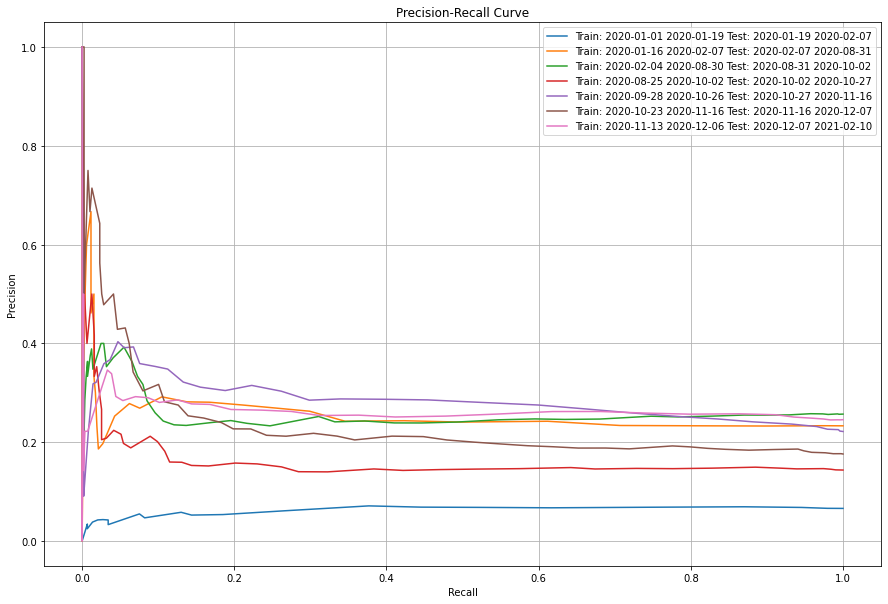

In [16]:
model.plot_precision_recall_curve()

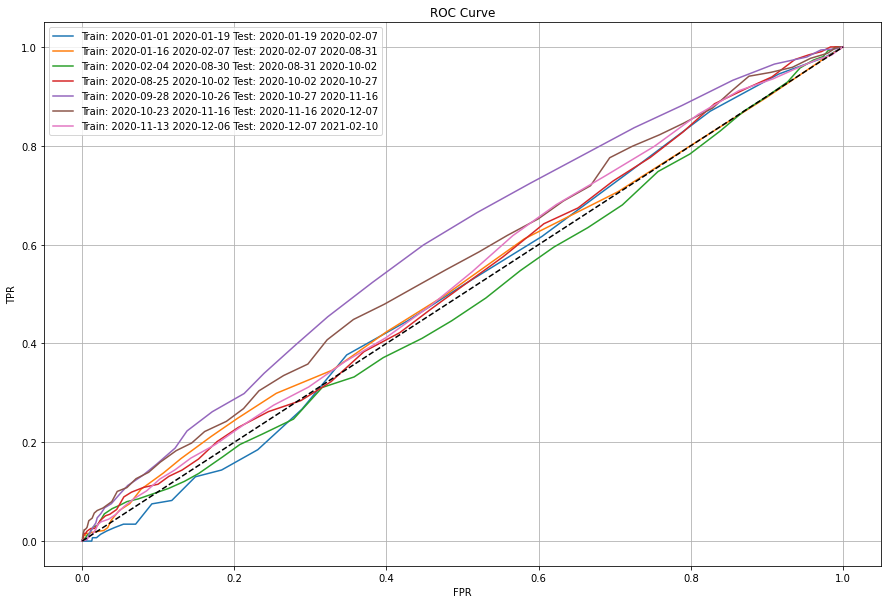

In [17]:
model.plot_roc_curve()

In [ ]:
model.plot_feature_importance()

In [ ]:
model.plot_probability_returns_scatter()

In [ ]:
model.probability_returns_table()

In [ ]:
model.run_train_on_more_data(date_from='2021-01-01')

In [ ]:
model.plot_feature_importance()

In [ ]:
model.model_threshold_table()

In [ ]:
model.set_model_threshold(model_threshold=0.5)

In [ ]:
model.save_model(filename='VulcanMeta.pkl')

# Appendix / Testing (to be deleted)

In [ ]:
idx = pd.IndexSlice

model.data['clf_y_pred_proba'].sort_index(level='date').plot(figsize=(15, 7))
model.data.loc[idx[:, 'ETH/USDT', :]]['profit_ratio'].sort_index(level='date').plot(secondary_y=True)


In [ ]:
feature_names_out = model.clf['full_transformer']['column_transformer'].get_feature_names_out()
feature_names_out

In [ ]:
transformed_data = model.clf['full_transformer'].transform(model.X_test)
transformed_data

In [ ]:
features_out_df = pd.DataFrame(transformed_data, columns=feature_names_out)
features_out_df

In [ ]:
features_out_df.plot(subplots=True, figsize=(10, 400))

In [ ]:
model.X_test.plot(subplots=True, figsize=(10, 400))

In [ ]:
fracdiff_coeff = model.clf['full_transformer']['column_transformer'].transformers_[1][1].d_
fracdiff_coeff

In [ ]:
import fracdiff

In [ ]:
ff = fracdiff.sklearn.FracdiffStat()

In [ ]:
ff.fit(model.X_test['momentum_ppo_hist_btc_12h'].values.reshape(-1, 1))

In [ ]:
model.X_test['momentum_ppo_hist_btc_12h'].plot()

In [ ]:
ff.d_

In [ ]:
model.clf.named_steps['column_transformer'].get_feature_names_out()

In [ ]:
model.roc_stats

In [18]:
df.to_csv('litmus_labeled_data_peter.csv')